In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")

In [3]:
df['nta_name'].unique()
list_nta = ['Greenpoint', 'Brighton Beach', 'Clinton', 'Hunts Point',
       'Longwood', 'Melrose South-Mott Haven North',
       'East Concourse-Concourse Village',
       'Ft. Totten-Bay Terrace-Clearview', 'Upper East Side-Carnegie Hill',
       'Arden Heights', 'West Brighton', 'Seagate-Coney Island',
       'Soundview-Castle Hill-Clason Point-Harding Park', 'Elmhurst',
       'North Corona', 'Jackson Heights', 'Springfield Gardens North',
       'Stapleton-Rosebank', 'Baisley Park', 'Van Cortlandt Village',
       'Spuyten Duyvil-Kingsbridge', 'Lincoln Square',
       'Sheepshead Bay-Gerritsen Beach-Manhattan Beach', 'Whitestone',
       'Murray Hill', 'Prospect Lefferts Gardens-Wingate', 'Co-op City',
       "Annadale-Huguenot-Prince's Bay-Eltingville", 'Woodhaven',
       'Rugby-Remsen Village', 'Elmhurst-Maspeth', 'Bayside-Bayside Hills',
       'Flushing',
       'Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill',
       'park-cemetery-etc-Bronx', 'Flatbush', 'park-cemetery-etc-Queens',
       'Corona', 'Queensboro Hill', 'Crown Heights North',
       'Bedford Park-Fordham North', 'park-cemetery-etc-Brooklyn',
       'Rego Park', 'Sunset Park East', 'park-cemetery-etc-Manhattan',
       'Upper West Side', 'North Side-South Side',
       'Washington Heights North', 'Pelham Parkway',
       'Allerton-Pelham Gardens', 'East Tremont',
       'Van Nest-Morris Park-Westchester Square',
       'Pomonok-Flushing Heights-Hillcrest', 'East Flushing', 'Bronxdale',
       'East Williamsburg', 'South Jamaica',
       'West New Brighton-New Brighton-St. George', 'East Harlem South',
       'Washington Heights South', 'Highbridge', 'Mount Hope',
       'West Concourse', 'Windsor Terrace', 'Woodside', 'Bushwick North',
       'Astoria', 'Williamsburg', 'Hunters Point-Sunnyside-West Maspeth',
       'Queensbridge-Ravenswood-Long Island City', 'Port Richmond',
       'Park Slope-Gowanus', 'Central Harlem South', 'Bedford',
       'Kew Gardens', 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill',
       'Brooklyn Heights-Cobble Hill', 'Parkchester', 'Bushwick South',
       'Soundview-Bruckner', 'Stuyvesant Heights',
       'Cypress Hills-City Line', 'Grymes Hill-Clifton-Fox Hills',
       'New Brighton-Silver Lake', 'West Farms-Bronx River',
       'College Point', 'Carroll Gardens-Columbia Street-Red Hook',
       'Richmond Hill', 'Crotona Park East', 'Sunset Park West',
       'Westchester-Unionport', 'Fort Greene', 'Ridgewood',
       'SoHo-TriBeCa-Civic Center-Little Italy', 'Chinatown',
       'Hammels-Arverne-Edgemere', 'Great Kills',
       'Schuylerville-Throgs Neck-Edgewater Park', 'West Village',
       'Steinway', 'Ocean Hill', 'Pelham Bay-Country Club-City Island',
       'Canarsie', 'Prospect Heights',
       'Hudson Yards-Chelsea-Flatiron-Union Square', 'Clinton Hill',
       'Forest Hills', 'Woodlawn-Wakefield', 'Old Astoria',
       'Turtle Bay-East Midtown', 'Airport',
       'Springfield Gardens South-Brookville', 'Yorkville',
       'East Elmhurst', 'Westerleigh', 'Bensonhurst East',
       'East Flatbush-Farragut', 'Midtown-Midtown South',
       'Lenox Hill-Roosevelt Island', 'Morrisania-Melrose', 'Gravesend',
       'Grasmere-Arrochar-Ft. Wadsworth',
       'Eastchester-Edenwald-Baychester', 'Hamilton Heights',
       'Williamsbridge-Olinville', 'Morningside Heights',
       'Old Town-Dongan Hills-South Beach', 'Brownsville', 'Maspeth',
       'Madison', 'Glendale', 'Crown Heights South',
       'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel',
       'North Riverdale-Fieldston-Riverdale', 'Gramercy', 'Bay Ridge',
       'Battery Park City-Lower Manhattan', 'East Harlem North',
       'Fresh Meadows-Utopia', 'Middle Village', 'Auburndale',
       'Kew Gardens Hills', 'Norwood', 'Oakwood-Oakwood Beach',
       'Oakland Gardens', 'Glen Oaks-Floral Park-New Hyde Park',
       'Ozone Park', 'Marble Hill-Inwood', 'East Village',
       'Stuyvesant Town-Cooper Village',
       'Charleston-Richmond Valley-Tottenville', 'South Ozone Park',
       'Midwood', 'Bensonhurst West', 'Homecrest',
       'Jamaica Estates-Holliswood', 'Central Harlem North-Polo Grounds',
       'Ocean Parkway South', 'New Springville-Bloomfield-Travis',
       'Lindenwood-Howard Beach', 'Briarwood-Jamaica Hills', 'Belmont',
       'Georgetown-Marine Park-Bergen Beach-Mill Basin', 'Rosedale',
       "Mariner's Harbor-Arlington-Port Ivory-Graniteville",
       'East New York', 'University Heights-Morris Heights', 'Flatlands',
       'Kingsbridge Heights', 'Kensington-Ocean Parkway',
       'Lower East Side', 'Fordham South', 'Claremont-Bathgate',
       'Manhattanville', 'East New York (Pennsylvania Ave)',
       'New Dorp-Midland Beach', 'Bath Beach', 'St. Albans', 'Hollis',
       'Douglas Manor-Douglaston-Little Neck', 'Borough Park', 'Jamaica',
       'Mott Haven-Port Morris', 'Cambria Heights', 'Laurelton',
       'Bellerose', 'Murray Hill-Kips Bay', 'Starrett City',
       'Queens Village', 'Dyker Heights', 'Far Rockaway-Bayswater',
       'Rossville-Woodrow', 'Erasmus']

In [11]:
for item in list_nta:
    is_nta = df['nta_name']== item
    is_dead = df['status']!= 'Alive'
    is_alive = df['status'] == 'Alive'
    total_trees = len(df[is_nta])
    dead_trees = len(df[is_nta & is_dead])
    alive_trees = len(df[is_nta & is_alive])
    print(item,",",dead_trees,",", alive_trees,",", total_trees,",",dead_trees/alive_trees*100)

Greenpoint , 119 , 4240 , 4359 , 2.806603773584906
Brighton Beach , 95 , 972 , 1067 , 9.77366255144033
Clinton , 124 , 1887 , 2011 , 6.571277159512453
Hunts Point , 228 , 3273 , 3501 , 6.966086159486709
Longwood , 96 , 1467 , 1563 , 6.5439672801636
Melrose South-Mott Haven North , 159 , 1997 , 2156 , 7.961942914371558
East Concourse-Concourse Village , 206 , 2237 , 2443 , 9.208761734465803
Ft. Totten-Bay Terrace-Clearview , 30 , 546 , 576 , 5.4945054945054945
Upper East Side-Carnegie Hill , 131 , 4080 , 4211 , 3.21078431372549
Arden Heights , 251 , 6392 , 6643 , 3.9267834793491865
West Brighton , 26 , 446 , 472 , 5.829596412556054
Seagate-Coney Island , 138 , 1355 , 1493 , 10.184501845018449
Soundview-Castle Hill-Clason Point-Harding Park , 107 , 3529 , 3636 , 3.0320204023802777
Elmhurst , 135 , 3013 , 3148 , 4.48058413541321
North Corona , 74 , 1482 , 1556 , 4.993252361673414
Jackson Heights , 254 , 5773 , 6027 , 4.399792135804607
Springfield Gardens North , 7 , 220 , 227 , 3.18181818

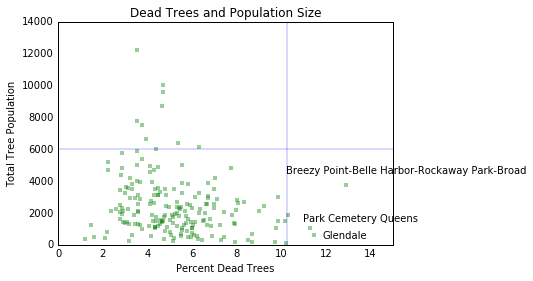

In [50]:
df = pd.read_csv("trees_dead_or_alive.csv")

df['proportion_dead'].describe()
df.sort_values(by='proportion_dead', ascending=False)
df.sort_values(by='Dead', ascending=False)

df.plot(kind = 'scatter', x = 'proportion_dead', y ='Total', marker = 's', lw=0, color = 'g', alpha = .4, ylim = (0,14000), xlim= (0,15))

#Label the outliers!!
plt.annotate('Breezy Point-Belle Harbor-Rockaway Park-Broad', xy=(12.908102, 3735), xytext=(60,20), 
           textcoords='offset points', ha='center', va='top')
plt.annotate('Glendale', xy=(11.487759,592), xytext=(30,5), textcoords='offset points', ha='center', va='top')
plt.annotate('Park Cemetery Queens', xy=(11.304348,1024), xytext=(50,15), textcoords='offset points', ha='center', va='top')
#Label those axes
plt.xlabel('Percent Dead Trees')
plt.ylabel('Total Tree Population')
plt.title("Dead Trees and Population Size")
#Turn off those ticks!
plt.tick_params(which='both',
              top='off',
              bottom='off',
              left='off',
              right='off')

#I calculated IQR*1.5+75th percentile to find the outliers
plt.axhline(y=2887.5+3137, lw=.3)
plt.axvline(x=3.9523080000000004+6.326422, lw=.3)
plt.savefig('Percent_Dead_Trees.pdf')

In [38]:
print(df['proportion_dead'].describe())
(6.326422-3.691550)*1.5
df[df['proportion_dead']>11]

count    193.000000
mean       5.273565
std        2.038542
min        1.212121
25%        3.691550
50%        5.032258
75%        6.326422
max       12.908102
Name: proportion_dead, dtype: float64


,NTA,Dead,Alive,Total,proportion_dead
36,park-cemetery-etc-Queens,104,920,1024,11.304348
130,Glendale,61,531,592,11.487759
132,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,427,3308,3735,12.908102


In [31]:
df['Total'].describe()

count      193.000000
mean      2426.637306
std       1893.541618
min         97.000000
25%       1212.000000
50%       2011.000000
75%       3137.000000
max      12188.000000
Name: Total, dtype: float64

In [77]:
df['proportion_dead'].describe()
df.corr()

,Dead,Alive,Total,proportion_dead
Dead,1.000000,0.853228,0.865361,0.195874
Alive,0.853228,1.000000,0.999719,-0.238887
Total,0.865361,0.999719,1.000000,-0.220638
proportion_dead,0.195874,-0.238887,-0.220638,1.000000


In [52]:
lm = smf.ols(formula="Total~Dead",data=df).fit() #notice the formula regresses Y on X (Y~X)
intercept, slope=lm.params

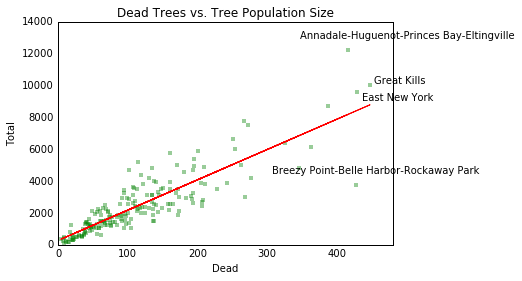

In [73]:
ax = df.plot(kind = 'scatter', x = 'Dead', y = 'Total', marker = 's', lw = 0, alpha = .4, color = 'g',
        ylim=(0,14000), xlim = (0,480),
        title = 'Dead Trees vs. Tree Population Size')

plt.plot(df["Dead"],slope*df["Dead"]+intercept,"-",color="red", lw =1) #Create best fit line
ax.tick_params(which='both',
               top='off',
               bottom='off',
               right='off',
               left='off')
plt.annotate('Annadale-Huguenot-Princes Bay-Eltingville', xy=(415, 12188), xytext=(60,20), 
           textcoords='offset points', ha='center', va='top')
plt.annotate('Great Kills', xy=(447,9999), xytext=(30,10), textcoords='offset points', ha='center', va='top')
plt.annotate('East New York', xy=(429,9588), xytext=(40,0), textcoords='offset points', ha='center', va='top')
plt.annotate('Breezy Point-Belle Harbor-Rockaway Park', xy = (427,3735), xytext=(20,20), textcoords='offset points', ha='center', va='top')
plt.savefig('Dead_Trees_Pop.pdf')

In [72]:
df[df['Dead']>400]

,NTA,Dead,Alive,Total,proportion_dead
27,Annadale-Huguenot-Prince's Bay-Eltingville,415,11773,12188,3.525015
96,Great Kills,447,9552,9999,4.679648
132,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,427,3308,3735,12.908102
165,East New York,429,9159,9588,4.683917


In [74]:
#Pull some basic statistics on dead trees
df['Dead'].describe()

count    193.000000
mean     113.186528
std       86.134261
min        4.000000
25%       51.000000
50%       96.000000
75%      147.000000
max      447.000000
Name: Dead, dtype: float64

In [ ]:
df.columns

In [ ]:
#Done with that, now I'd like to look at those few outliers more closely, so I read in the DF again.

In [79]:
df = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")

In [80]:
df.columns
df['dummy'] = df['status'].apply(lambda x: 0 if x == 'Dead' or x=='Stump' else 1)

#These are the NTAs I want to look at
df_outliers = df[(df['nta_name'] == 'East New York') | (df['nta_name'] == 'Highbridge')
   | (df['nta_name'] == 'Annadale-Huguenot-Princes Bay-Eltingville') | (df['nta_name'] == 'Seagate')
  | (df['nta_name'] == 'Highbridge') | (df['nta_name'] == 'Airport')]

In [97]:
df_deads = df_outliers[df_outliers['dummy'] == 0]
df.columns
len(df[df['user_type'] == 'Volunteer'])/len(df)

0.3446591265765756

In [ ]:
#So, I'm pretty sad because it looks like this data does not show the species names of dead or stumped trees.

In [95]:
df[df['dummy'] == 1]['spc_latin'].value_counts()

Platanus x acerifolia                 51890
Gleditsia triacanthos var. inermis    49198
Pyrus calleryana                      45092
Quercus palustris                     34555
Zelkova serrata                       21050
Tilia cordata                         19826
Prunus                                19025
Acer platanoides                      18682
Ginkgo biloba                         15804
Styphnolobium japonicum               14976
Acer rubrum                           12790
Fraxinus pennsylvanica                10871
Tilia americana                        9412
Liquidambar styraciflua                8022
Acer saccharinum                       7226
Ulmus americana                        6344
Quercus rubra                          5856
Acer                                   4823
Quercus bicolor                        4752
Prunus cerasifera                      4609
Tilia tomentosa                        4445
Ulmus parvifolia                       4308
Prunus virginiana               